# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
test_response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={cities[0]}").json()
pprint(test_response)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -42.7826, 'lon': 147.0587},
 'dt': 1661885990,
 'id': 2155415,
 'main': {'feels_like': 47.19,
          'humidity': 80,
          'pressure': 1012,
          'temp': 47.8,
          'temp_max': 51.71,
          'temp_min': 46.9},
 'name': 'New Norfolk',
 'sys': {'country': 'AU',
         'id': 2031307,
         'sunrise': 1661892051,
         'sunset': 1661931848,
         'type': 2},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 281, 'gust': 10, 'speed': 3}}


In [4]:
weather_chk = []
base_url = "http://api.openweathermap.org/data/2.5/weather?"
for city_index in range(0, len(cities)):
    w_url = f"{base_url}appid={weather_api_key}&units=imperial&q={cities[city_index]}"
    response = requests.get(w_url).json()
    try:
        weather_chk.append(response)
        pprint(f"Processing city number {city_index}, {cities[city_index]}")
    except Exception as e:
        print(f"{cities[city_index]} does not have weather information.")
    

'Processing city number 0, new norfolk'
'Processing city number 1, constitucion'
'Processing city number 2, cherskiy'
'Processing city number 3, ushuaia'
'Processing city number 4, bani'
'Processing city number 5, rio gallegos'
'Processing city number 6, cockburn town'
'Processing city number 7, rikitea'
'Processing city number 8, hobart'
'Processing city number 9, lata'
'Processing city number 10, nathdwara'
'Processing city number 11, tasiilaq'
'Processing city number 12, busselton'
'Processing city number 13, sulangan'
'Processing city number 14, hermanus'
'Processing city number 15, leninskoye'
'Processing city number 16, prince rupert'
'Processing city number 17, cape town'
'Processing city number 18, puerto ayora'
'Processing city number 19, illoqqortoormiut'
'Processing city number 20, mar del plata'
'Processing city number 21, kamenka'
'Processing city number 22, smoky lake'
'Processing city number 23, bethel'
'Processing city number 24, pisco'
'Processing city number 25, lakse

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_chk[0:2]

[{'coord': {'lon': 147.0587, 'lat': -42.7826},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 47.8,
   'feels_like': 47.19,
   'temp_min': 46.9,
   'temp_max': 51.71,
   'pressure': 1012,
   'humidity': 80},
  'visibility': 10000,
  'wind': {'speed': 3, 'deg': 281, 'gust': 10},
  'clouds': {'all': 100},
  'dt': 1661885990,
  'sys': {'type': 2,
   'id': 2031307,
   'country': 'AU',
   'sunrise': 1661892051,
   'sunset': 1661931848},
  'timezone': 36000,
  'id': 2155415,
  'name': 'New Norfolk',
  'cod': 200},
 {'coord': {'lon': -72.4167, 'lat': -35.3333},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 57.47,
   'feels_like': 56.25,
   'temp_min': 57.47,
   'temp_max': 57.47,
   'pressure': 1017,
   'humidity': 71,
   'sea_level': 1017,
   'grnd_level': 1013},
  'visibility': 10000,
  'wind'

In [6]:
w_lat = []
w_lng = []
max_temp = []
humidity = []
cloud = []
wind = []
country = []
w_date = []
w_cities = [] # Cities that have weather information

# loop through weather_chk list
for w in range(0, len(weather_chk)):
    try:
        w_lat.append(weather_chk[w]['coord']['lat'])
        w_lng.append(weather_chk[w]['coord']['lon'])
        max_temp.append(weather_chk[w]['main']['temp_max'])
        humidity.append(weather_chk[w]['main']['humidity'])
        cloud.append(weather_chk[w]['clouds']['all'])
        wind.append(weather_chk[w]['wind']['speed'])
        country.append(weather_chk[w]['sys']['country'])
        w_date.append(weather_chk[w]['dt'])
        w_cities.append(weather_chk[w]['name'])
    except Exception as e:
        print(f"{cities[w]} has no {e}")

city_weather_df = pd.DataFrame({
    "City": w_cities,
    "Lat":w_lat,
    "Lng":w_lng,
    "Max Temp":max_temp,
    "Humidity": humidity,
    "Cloudiness":cloud,
    "Wind Speed":wind,
    "Country": country,
    "Date":w_date})
city_weather_df.head()

illoqqortoormiut has no 'coord'
westpunt has no 'coord'
taolanaro has no 'coord'
amderma has no 'coord'
saryshagan has no 'coord'
barentsburg has no 'coord'
tumannyy has no 'coord'
palabuhanratu has no 'coord'
saleaula has no 'coord'
umzimvubu has no 'coord'
vaitupu has no 'coord'
nizhneyansk has no 'coord'
khormuj has no 'coord'
lalomanu has no 'coord'
sogdiondon has no 'coord'
belushya guba has no 'coord'
kamenskoye has no 'coord'
samusu has no 'coord'
urulga has no 'coord'
bandar-e torkaman has no 'coord'
bolshaya murta has no 'coord'
shkotovo-26 has no 'coord'
macaboboni has no 'coord'
tsihombe has no 'coord'
mys shmidta has no 'coord'
karamay has no 'coord'
halalo has no 'coord'
mocambique has no 'coord'
tabiauea has no 'coord'
marcona has no 'coord'
eldikan has no 'coord'
malwan has no 'coord'
formoso do araguaia has no 'coord'
meyungs has no 'coord'
manzil tamim has no 'coord'
qingan has no 'coord'
attawapiskat has no 'coord'
nylstroom has no 'coord'
jabiru has no 'coord'
grand 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,51.71,80,100,3.00,AU,1661885990
1,Constitución,-35.3333,-72.4167,57.47,71,68,7.90,CL,1661885991
2,Cherskiy,68.7500,161.3000,34.66,89,23,12.48,RU,1661885991
3,Ushuaia,-54.8000,-68.3000,49.66,57,75,5.75,AR,1661885992
4,Baní,18.2833,-70.3333,90.84,55,99,12.30,DO,1661885992


In [7]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,19.791031,18.059007,69.492064,69.803723,54.111675,7.938731,1.661886e+09
std,32.680839,90.010857,15.217893,21.724907,41.538274,5.127202,8.943921e+01
min,-54.800000,-175.200000,29.410000,11.000000,0.000000,0.000000,1.661886e+09
25%,-7.273750,-60.653300,59.630000,58.000000,8.000000,3.840000,1.661886e+09
50%,22.816700,20.225100,72.660000,75.000000,59.000000,6.890000,1.661886e+09
75%,44.635750,102.382750,80.330000,86.500000,100.000000,11.305000,1.661886e+09
max,78.218600,178.416700,103.150000,100.000000,100.000000,27.340000,1.661886e+09


In [8]:
city_weather_df.to_csv("./city_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# There is no city with humidity > 100%

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

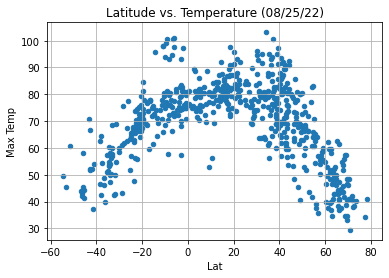

In [12]:
city_weather_df.plot(kind="scatter", x="Lat", y ="Max Temp", title="Latitude vs. Temperature (08/25/22)", grid = True)
plt.savefig("Images/Weather-lat_temp_fig.png")
plt.show()

This plot is displaying the highest temperatures for cities based on their latitude. There seems to be a non-linear (quadratic) relationship between the latitude and the max temperature as it is forming a parabola. The closer the latitude is to 20, the higher the max temperature is. The peak of the temperatures is approximately when the latitude is between 20 and 40. 

## Latitude vs. Humidity Plot

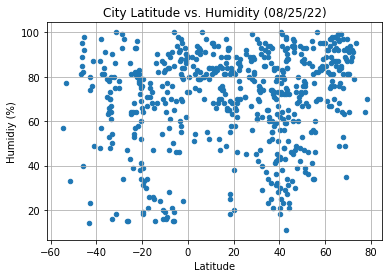

In [13]:
city_weather_df.plot(kind="scatter", x= 'Lat', y = "Humidity", title="City Latitude vs. Humidity (08/25/22)", grid=True)
plt.ylabel("Humidiy (%)")
plt.xlabel("Latitude")
plt.savefig("Images/Weather-lat_humidity.png")
plt.show()

This figure displays the latitude of the cities against the humidity. There does not seem to be any relationship between the latitude and humidity.

## Latitude vs. Cloudiness Plot

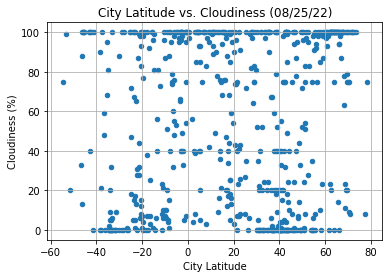

In [14]:
city_weather_df.plot(kind="scatter", x= 'Lat', y = "Cloudiness", title="City Latitude vs. Cloudiness (08/25/22)", grid=True)
plt.ylabel("Cloudiness (%)")
plt.xlabel("City Latitude")
plt.savefig("Images/Weather-lat_cloud.png")
plt.show()

There does not seem to be a relationship between the percentage of clouds and the latitude of the city.

## Latitude vs. Wind Speed Plot

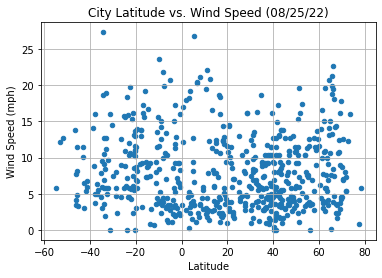

In [16]:
city_weather_df.plot(kind="scatter", x= 'Lat', y = "Wind Speed", title="City Latitude vs. Wind Speed (08/25/22)", grid=True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("Images/Weather-lat_wind.png")
plt.show()

There is not relationship between the wind speed and the latitude of each city. However, the majority of wind speed is between 0 and 15 mph.

## Linear Regression

In [20]:
# Linear Regression Function
def plot_lin_regress(x_values, y_values, x_label, y_label, file_path_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values)+1,min(y_values)+1),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"Regression Analysis: {y_label} vs. {x_label}")
    print(f"The r-value is: {rvalue**2}")
    plt.savefig(file_path_name)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5131899749674481


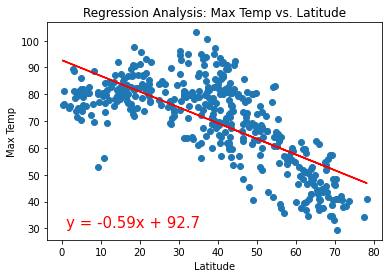

In [21]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']>=0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']>=0,"Max Temp"], "Latitude", "Max Temp","Images/Weather-north-lat_temp.png")

There seems to be a negative relationship between the max temperature and the latitude for the Northern Hemisphere. As you get further away from the equator, the max temperature decreases. Nevertheless, based on the r-value of 0.5, this seems to be a poor model as only 50.15% of the variance in the data can be explained by this model.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5859392262129932


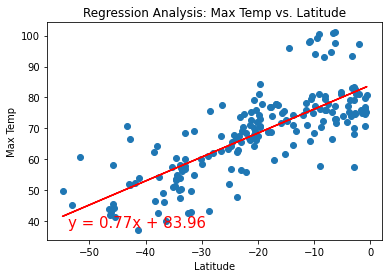

In [22]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']<0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']<0,"Max Temp"], "Latitude", "Max Temp", "Images/Weather-south-lat_temp.png")

There seems to be a positive relationship between the latitude and max temperature for cities in the southern hemisphere. As the latitude increases, the temperature increases. Nevertheless, the model is fairly poor. It has an R-square of 59.22% which means that 59.22% of the variance in the data can be explained by this model.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0009447037540052217


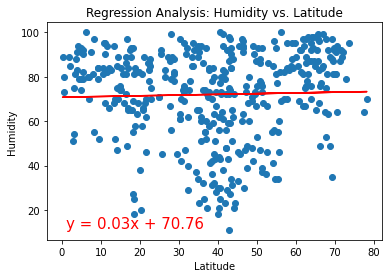

In [23]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']>=0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']>=0,"Humidity"], "Latitude", "Humidity", "Images/Weather-north-lat_humidity.png")

There does not seem to be any relationship between the latitude and humidity of each city. The R-square value is extremely low at 0.03%. Therefore, 0.03% of the data can be explained by this model. Thus, this linear model would be a poor predictor of humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0002214643647807262


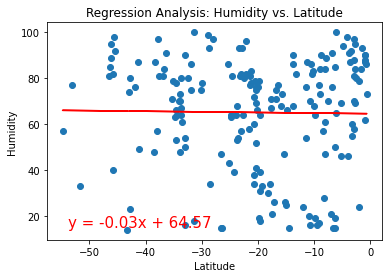

In [24]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']<0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']<0,"Humidity"], "Latitude", "Humidity", "Images/Weather-south-lat_humidity.png")

There is a weak positive relationship between the latitude and humidity for southern cities; however it is not a strong one. The R-square value is low at 0.59%. Therefore, 0.59% of the data can be explained by this model. Thus, this linear model would be a poor predictor of humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0010915804245988146


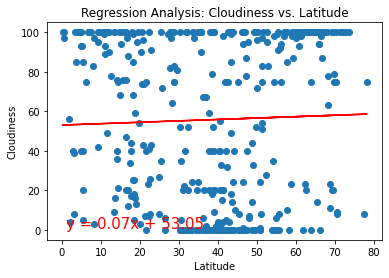

In [25]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']>=0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']>=0,"Cloudiness"], "Latitude", "Cloudiness", "Images/Weather-north-lat_cloud.png")

There is no relationship between the latitude and percentage of clouds. The R-square value is extremely low at 0.05%. Therefore this would be a poor model to predict the percentage of clouds as only 0.05% of data can be explained by this model.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.020955448926106218


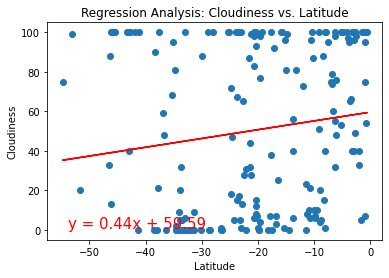

In [26]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']<0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']<0,"Cloudiness"], "Latitude", "Cloudiness", "Images/Weather-south-lat_cloud.png")

There is no relationship between the latitude and percentage of clouds. The R-square value is extremely low at 0.11%. Therefore this would be a poor model to predict the percentage of clouds as only 0.11% of data can be explained by this model.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004765209640700455


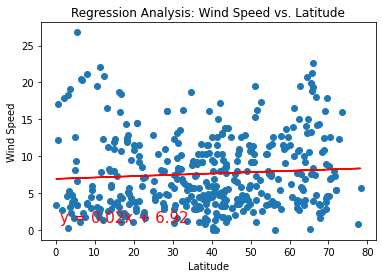

In [27]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']>=0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']>=0,"Wind Speed"], "Latitude", "Wind Speed", "Images/Weather-north-lat_wind.png")

There is a no relationship between the latitude and percentage of clouds. The R-square value is extremely low at 0.08%. Therefore this would be a poor model to predict the wind speed as only 0.08% of data can be explained by this model.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.001612177493820939


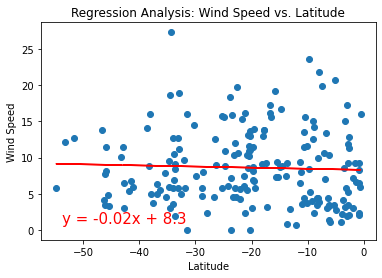

In [28]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']<0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']<0,"Wind Speed"], "Latitude", "Wind Speed", "Images/Weather-south-lat_wind.png")

There is no relationship between the latitude and the wind speed as the R-square value is low. R-sqaure is 1.81% which indicates that 1.18% of the data can be explained by the model. Thus, this model would not be a good model to use to predict wind speed.